# INTRODUCTION

The non-confidential TSCA Inventory contains ~86,685 substances of which 42,170 are active in commerce which renders the use of traditional approaches too resource and time intensive to generate relevant data to facilitate assessment. Herein a cheminformatic workflow was developed to identify a set of ~300 representative candidate case study chemicals from the TSCA non-confidential active inventory that could be submitted for screening in a range of different New Approach Methods (NAM) approaches.

# MATERIALS AND METHODS

## DATASET

The list of ~32,000 Non-confidential TSCA Active inventory substances that had been registered on the EPA CompTox Chemicals Dashboard (August 2022) [@williams2017] was downloaded for subsequent processing and analysis. This was filtered to only retain substances for which a discrete structure was available. There were 14,247 substances with structural information. The dataset was processed using the Python package RDKit (Landrum, rdkit.org) to convert the SMILES into molecular objects so that a structure-data-file (SDF) could be generated for input into the OPERA expert system [@mansouri2018] for physicochemical property predictions. Of the 14,247 substances, 51 substances could not be rendered into molecular objects by RDKit.

## CATEGORISATION WORKFLOW

Using the dataset, a categorisation workflow was developed to inform the selection of ~200-300 substances that would be representative of the TSCA Active inventory  from a structural perspective but in addition would meet the practical constraints of being procurable and testable in NAM screening systems. The approach developed relied on assigning substances into predefined categories known as primary categories which were subsequently subset into smaller categories (secondary categories) which were expected to be more structurally similar substances on the basis of chemical fingerprints. From the resulting secondary categories, approaches to identify representative substances taking into account other practical/technical constraints were considered. @fig-categorisation shows the conceptual workflow developed.

![Categorisation workflow](Figure1.png){#fig-categorisation}

## OPERA

The OPERA [@mansouri2018] version 2.8 was used to make a range of physicochemical properties predictions of for all substances in the dataset. LogP (octanol water partition coefficient) , melting point, boiling point, vapour pressure predictions were generated. Substances were standardised into QSAR READY format so that stereochemistry, salt forms etc were removed from the substances under consideration. Accordingly some substances could not be converted into QSAR READY format. Merging OPERA predictions with the starting dataset found that 946 substances were not associated with any OPERA prediction either because substances were mixtures (6), were too large in size to be processed (12), were not converted into a molecular objective by RDKit (51) or were inorganic (588) or organometallic (289) in nature. Predictions were possible for up to 13,299 substances from the starting dataset. 

## EPA NEW CHEMICAL CATEGORIES (NCC)

Under section 5 of the Toxic Substances Control Act (TSCA), EPA's New Chemicals programme helps manage potential risk to human health and the environment from chemicals new to the marketplace. For the purposes of regulation under TSCA, a chemical that is on the TSCA Inventory is considered "existing" as in a substance known to be in US commerce. Any substance that is not on the Inventory is considered "new". For a new chemical that will be imported or manufactured in the US, the manufacturer/importer is required to file a notice to EPA, known as a premanufacture notice (PMN). EPA then undertakes an assessment of that chemical to determine whether it poses a risk based on its hazard and exposure profile. One of the resources EPA makes use of during that assessment are so-named New Chemical Categories (NCC). These are a set of categories whereby substances with shared chemical and toxicological properties have been grouped into categories. Many of the categories are defined based on their structural characteristics such as functional groups and physicochemical parameters. In certain cases, the categories may provide indications of what ecotoxicological or toxicological hazards might be associated with that category thereby providing recommendations of the types of data that would be informative for an assessment. At present, there are 56 categories that have been developed. These were last updated in August 2010 (https://www.epa.gov/reviewing-new-chemicals-under-toxic-substances-control-act-tsca/chemical-categories-used-review-new) and are described in narrative form in a pdf document available for download. As part of this case study, the 56 categories were re-implemented into a machine readable format making use of structure query syntax (as Simplified molecular-input-entry-system (SMILES) arbitrary target specification (SMARTS)) to facilitate profiling of substances into one or more of the categories. The xml file of the NCC encoded in the OECD Toolbox v4.5 was exported and formed the foundation of creating an independent ruleset for the NCC which was augmented for certain categories. This ruleset provided a means of profiling the TSCA set of chemicals in their respective NCC. 

## CLASSYFIRE

All substance were additionally assigned into classes using the structure-based chemical taxonomy developed by [@feunang2016], ClassyFire assigns chemicals into a taxonomy consisting of >4800 different categories. The taxonomy comprises 11 different levels such as Kingdom, SuperClass, Class, SubClass etc. The webserver accessible at http://classyfire.wishartlab.com/ was used to query each substance by its hashed International Chemical Identifier (InChIKey) and assign it into Kingdom-SubClass levels. For the 14,247 substances - 13,460 were assigned into Kingdom 'Organic compounds', 593 into Kingdom 'Inorganic' and the remaining 194 returned no information. These 194 were assigned into an arbitary class of "Other" to facilitate ongoing processing. 

## SECONDARY-TERMINAL CATEGORIES

Since structural diversity was likely to be high within a primary category – an approach was needed to balance maximising 'within category structural similarity' relative to the total number of terminal categories. Hierarchical clustering (using Ward's criterion)  on the basis of Morgan chemical fingerprints (using radius 3 and bitvector length 1024) was applied those primary categories where membership exceeded 65 substances. The first generation of clusters was taken as the secondary category. 65 was an arbitrary but pragmatic threshold based on the distribution of membership size. 39 primary categories had a membership size less than 65. Primary categories whose membership was less than 65 were termed terminal categories. Primary categories containing more than 65 membership underwent further subcategorisation into secondary categories. These secondary categories were hence termed terminal categories. 

## REPRESENTATIVE SUBSTANCE SELECTION

The nominally representative substance for a given terminal category was taken as the medoid. This was defined as the substance with the minimum pairwise distance from all other members of that category. This was used as an initial seed to then identify and additional up to 5 structurally diverse substances within the category on the basis of their Morgan chemical fingerprints. The approach used in this case was the MaxMin procedure within RDKit. This was performed for all terminal categories with more than 5 members.

## CONSTRAINED INVENTORY

The inventory was constrained to only consider substances that were potentially screenable in the NAM suite. Screenability was based on 3 main considerations: 1) (physico)chemical characteristics, 2) procurability and 3) out of scope due to existing NAM data. The physicochemical characteristics captured physical state at room temperature and pressure. These were inferred based on the OPERA predictions generated. Melting and boiling point threshold as outlined in the US EPA Sustainable Futures Programme was used to provide thresholds for melting and boiling point to indicate whether a substance was likely to be a solid, liquid or gas. Volatility was modelled using vapour pressure. If a substance had a logVP less than 2, then it was screenable. The Lipinski rule of 5 [@lipinski2000] uses simple heuristics to denote oral absorption namely LogP <5, MW <500 and Hydrogen bond donor or acceptors (< 10 or <5). If any of these criteria are met, this is referred to a a Lipinski failure. If the number of Lipinski failures was less than 3 than a substance was considered screenable. Certain elements would also factor in the chemical characteristics. Substance should only contain the following elements, C, H, N, O, P, S, Halogens but not Si-O or B and not containing P-O bonds. Procurability was estimated based on the number of vendors listed on the PubChem website for a given substance. Out of scope referred to the substance having already been tested in the ToxCast screen. Considering all these aspects, the inventory was filtered to only retain substances that were tagged as screenable. For this set of substances, the medoids and MaxMin substances were identified using the same approach as already described in Section 2.7. 

## OTHER CONSIDERATIONS

Aside from selection of representative substances from the full and constrained inventory on the basis of the above considerations, several further aspects were factors into the final selection process. Analytical method detection amenability predictions for liquid-chromatography mass spectrometry (LM-MS) were generated using the QSAR model developed by [@lowe2022] to provide an indication of which chemicals lent themselves to aqueous-based screening. Structural considerations based on lists of substances known to be potentially explosive or highly reactivity were also tagged. Category membership size was additional consideration - size bins were set at less than 20 members, between 20-70, between 70-150, between 150-300 and finally between 300-600. A final manual check was performed to review all proposed candidate substances for testing following applicablition of these criteria.

## EVALUATION OF SELECTED CANDIDATE SUBSTANCES

### PHYSICOCHEMICAL COMPARISON

t-distributed schocastic neighbourhood mapping was applied on the inventory colour coding by screenable considerations and selection of candidate substances. The intention was to visually compare the extent to which the screenable and/or candidate selections were represenative from a structurable perspective across the TSCA Active inventory. In addition, 2D histograms were created to compare the distribution of the predicted physicochemical parameters between the full inventory and that of the selected candidates. 

### PREDICTED TOXICITY PROFILES

Predictions of the entire inventory were made using the Toxicity Estimation Tool (TEST) [@martin2000] for the developmental toxicity and Ames mutagenicity endpoints. These were projected onto 2D on a per terminal category basis to explore the extent to which predictions were consistent throughout the category or not. 

### PREDICTED TOXCAST PROFILES

Using a deep learning graph attention network developed in [@adams2023], predictions were made for the full inventory to profile the likely NAM profile. 

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl

In [6]:
TOP = os.getcwd().replace('reports/tsca', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'

# RESULTS AND DISCUSSION

## OPERA

Predictions were possible for up to 13,299 substances from the starting dataset.  946 substances were not associated with any OPERA prediction either because substances were mixtures (6), were too large in size to be processed (12), were not converted into a molecular objective by RDKit (51) or were inorganic (588) or organometallic (289) in nature. 

## EPA NEW CHEMICAL CATEGORIES (NCC)

The dataset was processed through the NCC to make category assignments. Over 46% of substances were not assigned to any NCC. The next largest NCC assignment was neutral organics (18.7%), followed by esters, phenols and anilines. Substances would be assigned to more than 1 NCC e.g. Esters and Substituted Triazines. There were 141 unique combinations of NCC of which 99 comprised 2 or more NCC and the remaining 43 were single NCC. @fig-NCC shows the number of substances that were assigned into these NCC, only the first 50 are shown. 

In [17]:
df = pd.read_excel(interim_dir+'TSCA_all_110822.xlsx', sheet_name = 'TSCA_ALL', index_col = [0])

In [173]:
import re

In [158]:
df1 = (df.NCC.value_counts(dropna = False, normalize = False)
 .reset_index())

In [159]:
df1['index'] = (df1['index'].replace(np.nan, 'None')
 .apply(lambda x : re.sub(r'\(Acute toxicity\)|\(Chronic toxicity\)',  r'', x))
 .apply(lambda x : re.sub(r'\(|\)',  r'', x))
)

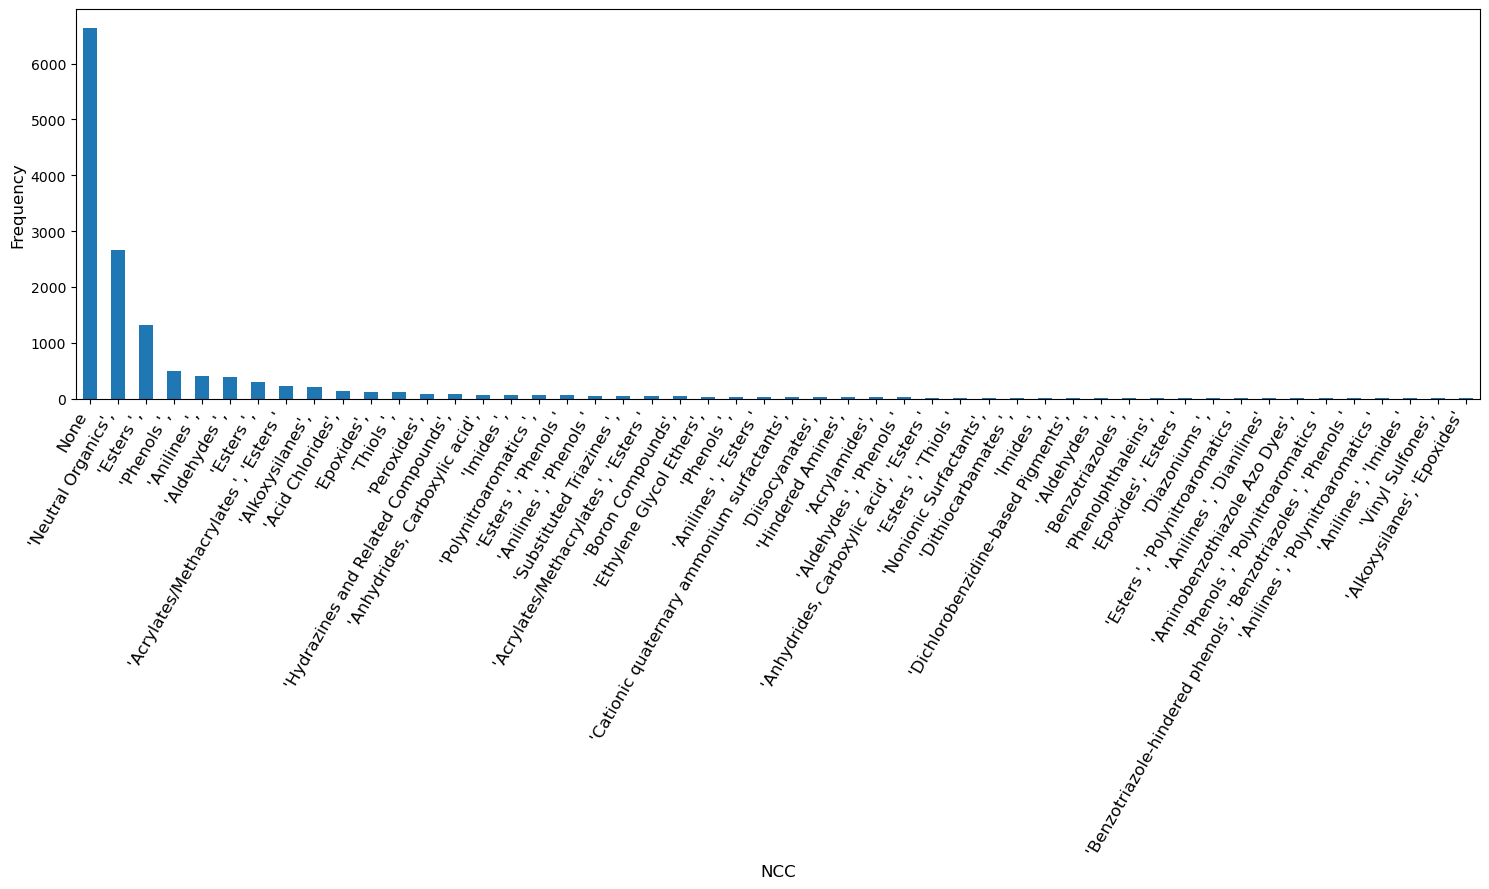

In [186]:
#| label: fig-NCC
#| fig-cap: 'Frequency of NCC membership, first 50 categories shown'

f, ax = plt.subplots(figsize = (15,9))
df1.head(50).NCC.plot.bar()
ax.set_xticklabels(df1['index'][:50],  rotation = 60,ha="right", fontsize = 12)
ax.set_ylabel('Frequency', fontsize =12)
ax.set_xlabel('NCC', fontsize =12)
plt.tight_layout();


In [61]:
chk = [e.strip(")").strip('(').strip('"').split(',') for e in df.NCC.unique().tolist() if pd.notnull(e)] 

In [176]:
#len([(e[0],e[1]) for e in chk if e[1] == ''])

## CLASSYFIRE

Since almost 47% of substances could not be assigned to a NCC, the ClassyFire taxonomy was used to assign substances into classes based on its chemical taxonomy. Substances that returned no taxonnomy information was assigned to an arbitrary "Other" class. The majority of substances (13477) were assigned to the Organic compounds Kingdom. At the next level of granularity, Superclass was associated with 27 categories whereas a level down Class was associated with 270 unique categories. Given the objective of identifying 200-300 candidates for testing, using "Class' as a basis for the primary category (per @fig-categorisation) would rapidly exceed the number of practical categories from which to draw from. Exploring the frequency of the Superclass designation found that whilst there were 27 unique categories, 5 had memberships exceeding 1000. A hybrid approach of using Superclass as the primary category designation was taken for Superclasses than contained less than 1000 members whereas the 5 Superclasses (Benzenoids, Lipids and Lipid-like, Organoheterocyclic compounds, Organic acids and derivatives, Organic oxygen compounds) were expanded into their Classes. This resulted in 68 unique ClassyFire categories that formed the basis of the primary categories. @fig-ClassyFire shows the frequency of the TSCA active inventory across these ClassyFire primary categories.

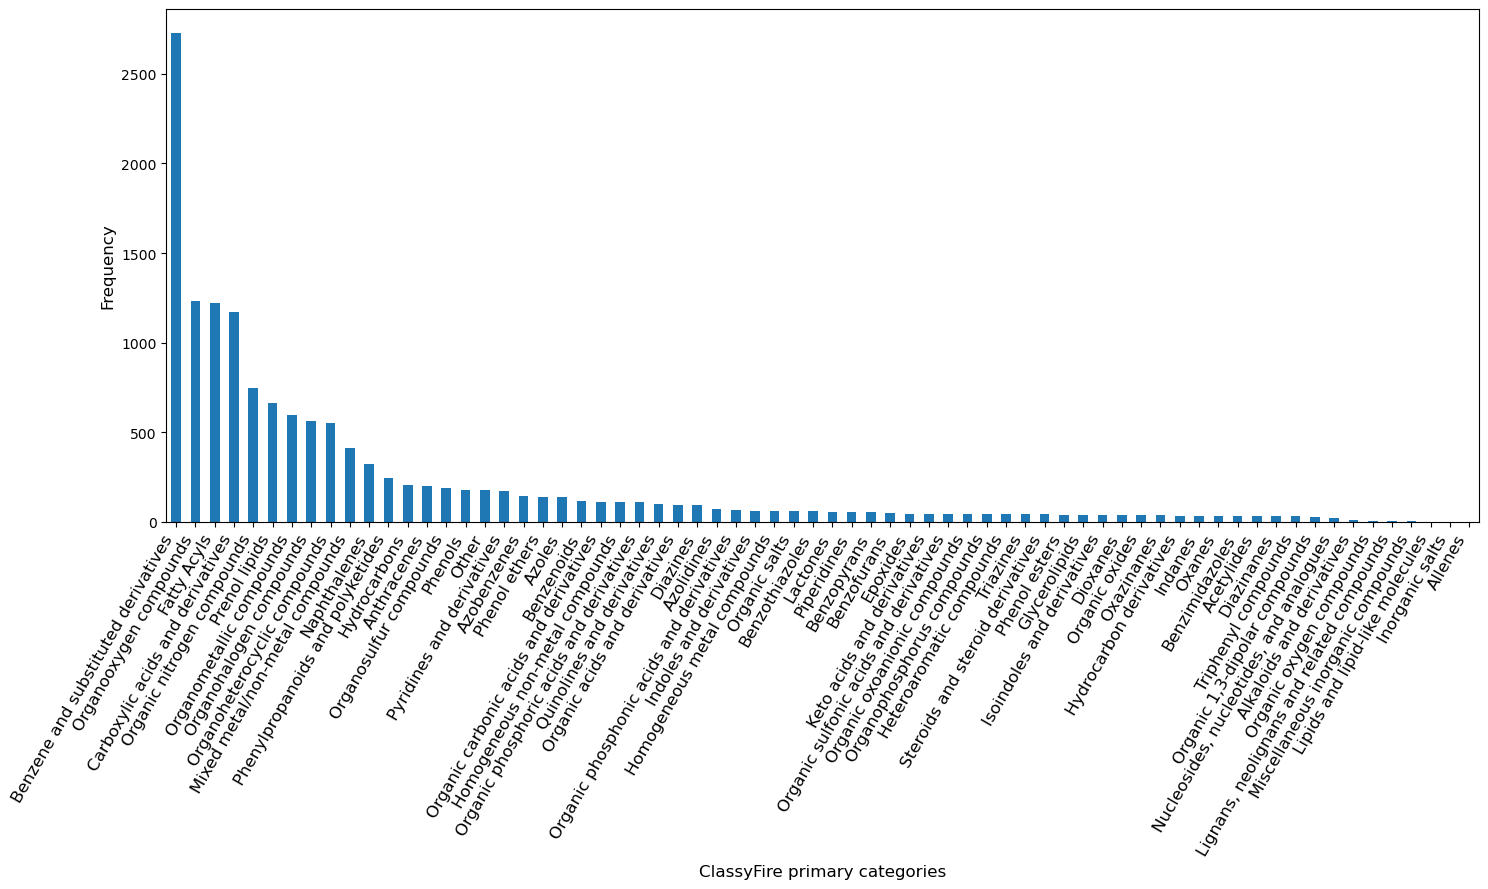

In [187]:
#| label: fig-ClassyFire
#| fig-cap: 'Frequency of ClassyFire primary categories'

f1, ax1 = plt.subplots(figsize = (15,9))
df.ClassyFire.value_counts().plot.bar()
ax1.set_xticklabels(ax1.get_xticklabels() , rotation = 60, ha="right", fontsize = 12)
ax1.set_ylabel('Frequency', fontsize =12)
ax1.set_xlabel('ClassyFire primary categories', fontsize =12)
plt.tight_layout();

## SECONDARY-TERMINAL CATEGORISATION

Based on the subcategorisation performed, a total of 188 terminal categories were derived which comprised primary and secondary categories. 

## DIVERSE SUBSTANCE SELECTION

A total of 467 substances were identified as a result of the MaxMin procedure for the entire inventory. The same procecdure was also undertaken for the constrained screeninable inventory (comprising 7565 substances) yielding 438 substances. 

## PROFILING OF SELECTED CANDIDATE SUBSTANCES

In [190]:
df2 = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_011222.xlsx', sheet_name = 'All data')

[<BarContainer object of 47 artists>, <BarContainer object of 10 artists>]


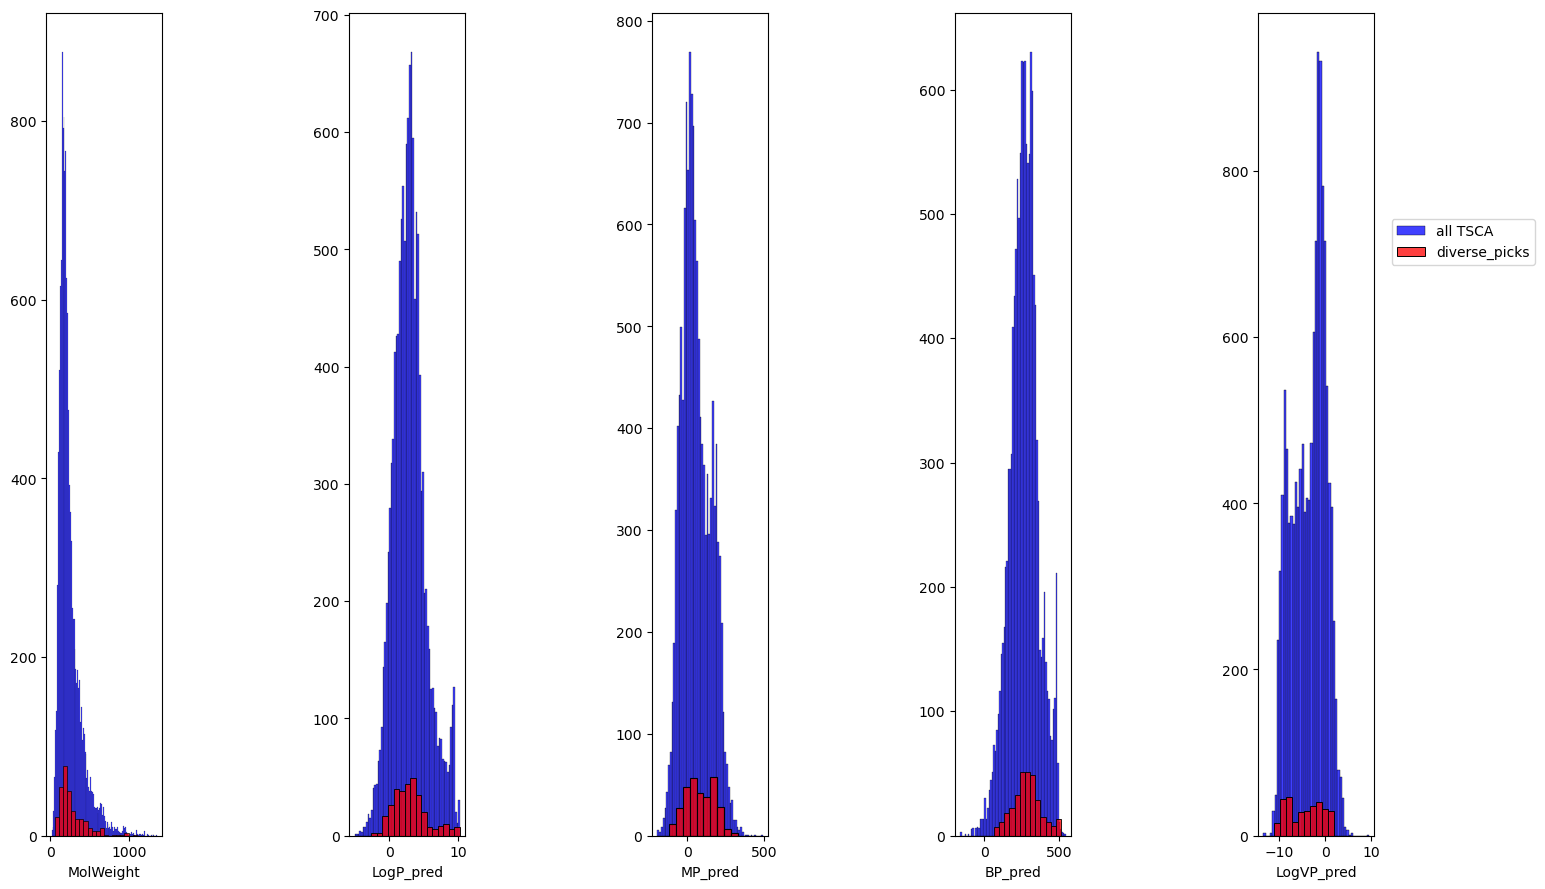

In [195]:
#| label: fig-OPERA
#| fig-cap: 'Physical property profiles between full inventory and candidate selections'


f2 = plt.figure(figsize = (20,9))
k=0
for n, e in enumerate( ['MolWeight','LogP_pred','MP_pred','BP_pred','LogVP_pred']):
    ax = plt.subplot(1,7, n+1)
    g = sns.histplot(df2[e], color = 'b', ax = ax, label = 'all TSCA')
    g = sns.histplot(df2[df2['final_picks']==1][e], color = 'r', ax = ax, label = 'diverse_picks')
    ax.set_ylabel("");
    #plt.subplots_adjust(hspace = 0.8)
handles, labels = ax.get_legend_handles_labels()
print(handles)
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.15,0.75), loc=2, borderaxespad=0.);
plt.tight_layout();